In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('G:\SRM\MHDS\R\Mental Health Project\Extracterd data\Data from 5-11\MH__rts.csv',encoding = 'latin')
df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,quoted_status_permalink,quote_count,timestamp_ms,reply_count,filter_level,query,withheld_scope,withheld_copyright,withheld_in_countries,possibly_sensitive_appealable
0,2022-10-10 18:38:08,1.579459e+18,1579458762578198529,"Every breath, a breakthrough. In honor of #Wor...",False,195,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-10 23:47:04,1.579537e+18,1579536505881886720,@liamgallagher @TalkClubUK Im feeling good at...,False,147,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""http://twitter.com/download/iphone"" r...",1.579455e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-10 04:35:00,1.579247e+18,1579246579944460289,"This #WorldMentalHealthDay, recognize that men...",False,116,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""https://about.twitter.com/products/tw...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-10-11 13:09:37,1.579738e+18,1579738476291198977,RT @RingCentral: Today is RingCentrals quarte...,False,140,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""recent"", iso_language_code...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-11 13:09:36,1.579738e+18,1579738472788918273,RT @ftaw16_: A Tigrayan woman said that a sold...,False,139,"list(hashtags = list(text = NA, indices = list...","list(result_type = ""recent"", iso_language_code...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'metadata', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'text', 'favorited_by', 'scopes', 'display_text_width',
       'quoted_status_permalink', 'quote_count', 'timestamp_ms', 'reply_count',
       'filter_level', 'query', 'withheld_scope', 'withheld_copyright',
       'withheld_in_countries', 'possibly_sensitive_appealable'],
      dtype='object')

In [4]:
df.dtypes

created_at                        object
id                               float64
id_str                             int64
full_text                         object
truncated                           bool
display_text_range                 int64
entities                          object
metadata                          object
source                            object
in_reply_to_status_id            float64
in_reply_to_status_id_str        float64
in_reply_to_user_id              float64
in_reply_to_user_id_str          float64
in_reply_to_screen_name           object
geo                               object
coordinates                       object
place                             object
contributors                     float64
is_quote_status                     bool
retweet_count                      int64
favorite_count                     int64
favorited                           bool
retweeted                           bool
possibly_sensitive                object
lang            

In [5]:
df['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
       '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://www.linkedin.com/" rel="nofollow">LinkedIn</a>',
       '<a href="https://app.sendible.com" rel="nofollow">Sendible</a>',
       '<a href="https://ifttt.com" rel="nofollow">IFTTT</a>',
       '<a href="https://www.echobox.com" rel="nofollow">Echobox</a>',
       '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>',
       '<a href="https://orlo.tech" rel="nofollow">Orlo</a>',
       '<a href="https://buffer.com" rel="nofollow">Buffer</a>',
       '<a href="http://gainapp.com" rel="nofollow">Gain 

In [6]:
df['source'].value_counts()

<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                 1659
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      1073
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>     966
<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>                    427
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      163
                                                                                        ... 
<a href="https://paper.li" rel="nofollow">Paper.li</a>                                     1
<a href="https://totalexpert.net" rel="nofollow">Total Expert</a>                          1
<a href="https://contentstudio.io" rel="nofollow">ContentStudio.io</a>                     1
<a href="http://checkiday.com/" rel="nofollow">Checkiday.com</a>                           1
<a href="https://www.vbout.com" rel="nofollow">PostingPlatform</a>    

In [7]:
df['source'].value_counts().nlargest(30)

<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                  1659
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>       1073
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>      966
<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>                     427
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       163
<a href="https://sproutsocial.com" rel="nofollow">Sprout Social</a>                       134
<a href="https://buffer.com" rel="nofollow">Buffer</a>                                     99
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>          85
<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>               41
<a href="https://orlo.tech" rel="nofollow">Orlo</a>                                        40
<a href="http://www.hubspot.com/" rel="nofollow">HubSpot</a>

<AxesSubplot:>

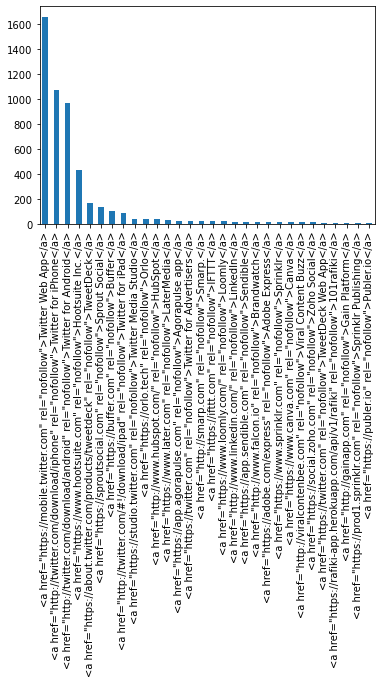

In [8]:
df['source'].value_counts().nlargest(30).plot(kind='bar')

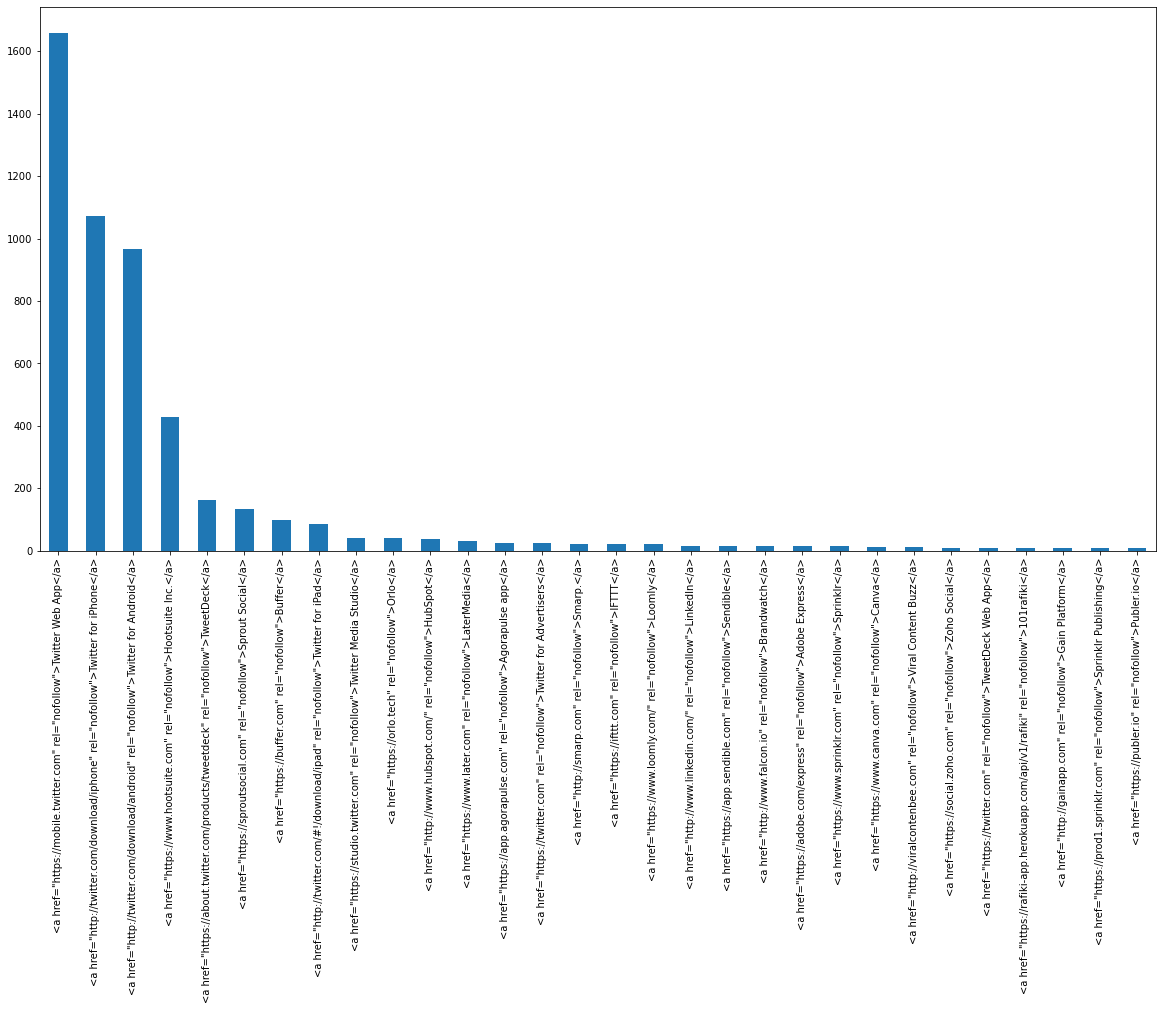

In [9]:
plt.figure(figsize = (20,10))
df['source'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In [10]:
!pip install neattext

In [11]:
import neattext.functions as nfx

In [12]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [13]:
df['text'].iloc[0]

'Every breath, a breakthrough.\xa0In honor of\xa0#WorldMentalHealthDay I wanted to share\xa0the trailer for my documentary Selena Gomez: My Mind &amp; Me.\xa0November 4 on @AppleTVPlus https://t.co/h8bkDd9mmV https://t.co/2D4HixbCjL'

In [14]:
df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,quoted_status_permalink,quote_count,timestamp_ms,reply_count,filter_level,query,withheld_scope,withheld_copyright,withheld_in_countries,possibly_sensitive_appealable
0,2022-10-10 18:38:08,1.579459e+18,1579458762578198529,"Every breath, a breakthrough. In honor of #Wor...",False,195,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-10 23:47:04,1.579537e+18,1579536505881886720,@liamgallagher @TalkClubUK Im feeling good at...,False,147,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""http://twitter.com/download/iphone"" r...",1.579455e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-10 04:35:00,1.579247e+18,1579246579944460289,"This #WorldMentalHealthDay, recognize that men...",False,116,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""https://about.twitter.com/products/tw...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-10-11 13:09:37,1.579738e+18,1579738476291198977,RT @RingCentral: Today is RingCentrals quarte...,False,140,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""recent"", iso_language_code...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-11 13:09:36,1.579738e+18,1579738472788918273,RT @ftaw16_: A Tigrayan woman said that a sold...,False,139,"list(hashtags = list(text = NA, indices = list...","list(result_type = ""recent"", iso_language_code...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df['text'].apply(nfx.extract_hashtags)

0                                 [#WorldMentalHealthDay]
1                                 [#WorldMentalHealthDay]
2                                [#WorldMentalHealthDay,]
3                                [#WorldMentalHealthDay.]
4                                                      []
                              ...                        
5178                             [#WorldMentalHealthDay.]
5179    [#redbubble, #stickers, #bee, #bees, #beepuns,...
5180    [#NationalNutritionWeek, #nationalnutritionwee...
5181                     [#?????, #NationalNutritionWeek]
5182    [#NationalNutritionWeek, #healthylifestyle, #H...
Name: text, Length: 5183, dtype: object

In [16]:
df['extracted_hashtags'] = df['text'].apply(nfx.extract_hashtags)

In [17]:
df['extracted_hashtags']

0                                 [#WorldMentalHealthDay]
1                                 [#WorldMentalHealthDay]
2                                [#WorldMentalHealthDay,]
3                                [#WorldMentalHealthDay.]
4                                                      []
                              ...                        
5178                             [#WorldMentalHealthDay.]
5179    [#redbubble, #stickers, #bee, #bees, #beepuns,...
5180    [#NationalNutritionWeek, #nationalnutritionwee...
5181                     [#?????, #NationalNutritionWeek]
5182    [#NationalNutritionWeek, #healthylifestyle, #H...
Name: extracted_hashtags, Length: 5183, dtype: object

In [18]:
df['clean_tweet'] = df['text'].apply(nfx.remove_hashtags)

In [19]:
df[['text','clean_tweet']]

,text,clean_tweet
0,"Every breath, a breakthrough. In honor of #Wor...","Every breath, a breakthrough. In honor of I ..."
1,@liamgallagher @TalkClubUK Im feeling good at...,@liamgallagher @TalkClubUK Im feeling good at...
2,"This #WorldMentalHealthDay, recognize that men...",This recognize that mental health is as impo...
3,RT @RingCentral: Today is RingCentrals quarte...,RT @RingCentral: Today is RingCentrals quarte...
4,RT @ftaw16_: A Tigrayan woman said that a sold...,RT @ftaw16_: A Tigrayan woman said that a sold...
...,...,...
5178,"RT @HealingWorksAu: This month, we're acknowle...","RT @HealingWorksAu: This month, we're acknowle..."
5179,Bee Yourself / Be Yourself - Cute Bee Pun Stic...,Bee Yourself / Be Yourself - Cute Bee Pun Stic...
5180,National Nutrition Week 2022: ????? ??????????...,National Nutrition Week 2022: ????? ??????????...
5181,#????? ??????????? ????? 2022 \n#NationalNutri...,??????????? ????? 2022 \n \n@WHO https://t....


In [20]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : nfx.remove_userhandles(x))

In [21]:
df[['text','clean_tweet']]

,text,clean_tweet
0,"Every breath, a breakthrough. In honor of #Wor...","Every breath, a breakthrough. In honor of I ..."
1,@liamgallagher @TalkClubUK Im feeling good at...,"Im feeling good at the moment, 8/10. Agre..."
2,"This #WorldMentalHealthDay, recognize that men...",This recognize that mental health is as impo...
3,RT @RingCentral: Today is RingCentrals quarte...,RT Today is RingCentrals quarterly CaRing D...
4,RT @ftaw16_: A Tigrayan woman said that a sold...,RT A Tigrayan woman said that a soldier and ...
...,...,...
5178,"RT @HealingWorksAu: This month, we're acknowle...","RT This month, we're acknowledging This ye..."
5179,Bee Yourself / Be Yourself - Cute Bee Pun Stic...,Bee Yourself / Be Yourself - Cute Bee Pun Stic...
5180,National Nutrition Week 2022: ????? ??????????...,National Nutrition Week 2022: ????? ??????????...
5181,#????? ??????????? ????? 2022 \n#NationalNutri...,??????????? ????? 2022 \n \n https://t.co/...


In [22]:
df['clean_tweet'].iloc[10]

"RT   This World Mental Health Day, let's create awareness and be compassionate towards people facing mental health issues. It i\x85"

In [23]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [24]:
df['clean_tweet'].iloc[10]

"RT This World Mental Health Day, let's create awareness and be compassionate towards people facing mental health issues. It i\x85"

In [25]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [26]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

### Sentimental Analysis

In [27]:
!pip install textblob

In [28]:
from textblob import TextBlob

In [29]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'Polarity':sentiment_polarity,'Subjectivity':sentiment_subjectivity,'Sentiment':sentiment_label}
    return result

In [30]:
exl = df['clean_tweet'].iloc[15]

In [31]:
get_sentiment(exl)

{'Polarity': -0.05, 'Subjectivity': 0.1, 'Sentiment': 'Negative'}

In [32]:
df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)

In [33]:
df['sentiment_results']

0       {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
1       {'Polarity': 0.7, 'Subjectivity': 0.6000000000...
2       {'Polarity': 0.10000000000000002, 'Subjectivit...
3       {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
4       {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
                              ...                        
5178    {'Polarity': -0.05, 'Subjectivity': 0.1, 'Sent...
5179    {'Polarity': 0.5, 'Subjectivity': 1.0, 'Sentim...
5180    {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
5181    {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
5182    {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
Name: sentiment_results, Length: 5183, dtype: object

In [34]:
df['sentiment_results'].iloc[10]

{'Polarity': -0.1, 'Subjectivity': 0.2, 'Sentiment': 'Negative'}

In [35]:
pd.json_normalize(df['sentiment_results'].iloc[10])

,Polarity,Subjectivity,Sentiment
0,-0.1,0.2,Negative


In [36]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [37]:
df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,withheld_scope,withheld_copyright,withheld_in_countries,possibly_sensitive_appealable,extracted_hashtags,clean_tweet,sentiment_results,Polarity,Subjectivity,Sentiment
0,2022-10-10 18:38:08,1.579459e+18,1579458762578198529,"Every breath, a breakthrough. In honor of #Wor...",False,195,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,[#WorldMentalHealthDay],Every breath a breakthrough In honor of I want...,"{'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...",0.0,0.000000,Neutral
1,2022-10-10 23:47:04,1.579537e+18,1579536505881886720,@liamgallagher @TalkClubUK Im feeling good at...,False,147,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""http://twitter.com/download/iphone"" r...",1.579455e+18,...,NaN,NaN,NaN,NaN,[#WorldMentalHealthDay],Im feeling good at the moment 8/10 Agree it...,"{'Polarity': 0.7, 'Subjectivity': 0.6000000000...",0.7,0.600000,Positive
2,2022-10-10 04:35:00,1.579247e+18,1579246579944460289,"This #WorldMentalHealthDay, recognize that men...",False,116,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""https://about.twitter.com/products/tw...",NaN,...,NaN,NaN,NaN,NaN,"[#WorldMentalHealthDay,]",This recognize that mental health is as import...,"{'Polarity': 0.10000000000000002, 'Subjectivit...",0.1,0.447619,Positive
3,2022-10-11 13:09:37,1.579738e+18,1579738476291198977,RT @RingCentral: Today is RingCentrals quarte...,False,140,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""recent"", iso_language_code...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,[#WorldMentalHealthDay.],RT Today is RingCentrals quarterly CaRing Day...,"{'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...",0.0,0.000000,Neutral
4,2022-10-11 13:09:36,1.579738e+18,1579738472788918273,RT @ftaw16_: A Tigrayan woman said that a sold...,False,139,"list(hashtags = list(text = NA, indices = list...","list(result_type = ""recent"", iso_language_code...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,[],RT A Tigrayan woman said that a soldier and ci...,"{'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...",0.0,0.000000,Neutral


In [38]:
df['Sentiment'].value_counts()

Positive    2796
Negative    1311
Neutral     1076
Name: Sentiment, dtype: int64

<AxesSubplot:>

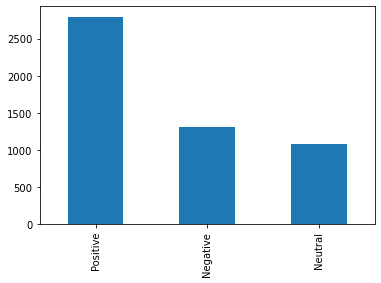

In [39]:
df['Sentiment'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

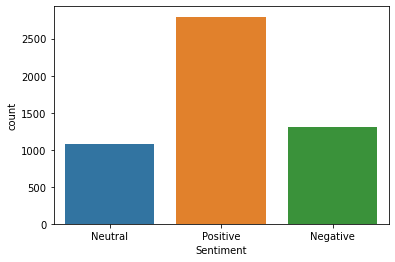

In [40]:
sns.countplot(df['Sentiment'])

In [41]:
positive_tweet = df[df['Sentiment'] == 'Positive']['clean_tweet']

In [42]:
negative_tweet = df[df['Sentiment'] == 'Negative']['clean_tweet']

In [43]:
neutral_tweet = df[df['Sentiment'] == 'Neutral']['clean_tweet']

In [44]:
positive_tweet

1        Im feeling good at the moment 8/10 Agree it...
2       This recognize that mental health is as import...
5       RT keep your mental health at the top of your ...
6       RT Its important to treat yourself with kindne...
9                           RT Hope everyone has a great 
                              ...                        
5173    Today is World Mental Health Day a day to remi...
5174    HAT DAY IS 7 DAYS AWAY Join us in Lifting the ...
5175                             How much fun is bipolar 
5176    RT Bee Yourself / Be Yourself  Cute Bee Pun St...
5179    Bee Yourself / Be Yourself  Cute Bee Pun Stick...
Name: clean_tweet, Length: 2796, dtype: object

In [45]:
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()

In [46]:
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [47]:
positive_tweet_list

['I\x92m feeling good moment 8/10 Agree it\x92s good talk Hope you\x92re alright',
 'recognize mental health important physical health care',
 'RT mental health priority list hope doin okay alon',
 'RT important treat kindness (: Getty/TW/harrysenigma)',
 'RT Hope great',
 'RT Engineering exteriority engineering interiority like cart horse best cart',
 'months asked got started freelance writing created simple thread understand epic journey',
 'RT Today important day hope kinder hope reme',
 'RT time talked whats mind Opening struggles trust',
 'Hands who\x92s glad platitudes stop real improvement work started hands thinks actually happen',
 'RT important highlight carers can\x92t meet friend walk feel mental health g',
 'RT Evening Trees informers time twinkles evening called precious sons Serenity',
 'RT congenital heart disease doesnt affect physical health share spread',
 'RT Talk Listen Support Today important remember: noones || htt',
 'RT Wise words Min Yoongi',
 'RT It\x92s tod

In [48]:
negative_tweet_list

['RT trees improves mental wellbeing',
 'RT World Mental Health Day lets create awareness compassionate people facing mental health issues',
 'RT honour reminder need prioritise mental wellbeing actively restore',
 'RT World Mental Health Day amp checking ambassador Nick Ray whos circumnavigating Scotland kayak Nicks',
 'RT lets fight NHS guarantees universal mental health support Lets fight',
 'day yesterday WMHD Completed 12 weeks Alcohol raise money Raised £300 £780 total LFT £1000 raised total Mental Health National Mental Health Champion Tournament',
 'RT Society rise prejudice mental health amp support struggling silently Don\x92t walk wh',
 'likes bang hint irony taking responsibility actually backing calling fucked forgive forget',
 'RT celebrate allow share photo it\x92s late pursue',
 'RT grace forgive mistakes release regrets care Set time aside week',
 'RT need prioritise mental health 365 days year',
 'RT According poses severe risks peoples mental health wellbeing f',
 'R

In [49]:
neutral_tweet_list

['breath breakthrough honor wanted share trailer documentary Selena Gomez: Mind amp November 4',
 'RT Today RingCentral\x92s quarterly CaRing Day observance encourage employees',
 'RT Tigrayan woman said soldier civilians gang raped months spoke said',
 'RT Im offering wellbeing advice selfcare mindfulness compensate deva',
 'RT end read moving blog post volunteer Nhlalala Baloyi pulling demons ou',
 'RT conversation starts question Working wanted h',
 'RT depression looks like',
 'RT said',
 'RT Thats Embarrassing',
 'RT Robin Williams',
 'RT pastor point periodically mention sermons seasons counseling therapist',
 'RT Richards wife died 2008 amp spiralled depression Hearing dog Dillon helped reconnect world wh',
 'James Brown | Influential Phyna',
 'RT I\x92ll stay fighting',
 'RT 21game winner Kyle Wright story hed like share',
 'RT Serenity peace grow come blue indigo purple time fall ufah',
 'RT youre going youre like',
 'RT join architectural historian Patrick Quinlan \x91Institu

In [50]:
for line in positive_tweet_list:
    #print(line)
    for token in line.split():
        print(token)

Im
feeling
good
moment
8/10
Agree
its
good
talk
Hope
youre
alright
recognize
mental
health
important
physical
health
care
RT
mental
health
priority
list
hope
doin
okay
alon
RT
important
treat
kindness
(:
Getty/TW/harrysenigma)
RT
Hope
great
RT
Engineering
exteriority
engineering
interiority
like
cart
horse
best
cart
months
asked
got
started
freelance
writing
created
simple
thread
understand
epic
journey
RT
Today
important
day
hope
kinder
hope
reme
RT
time
talked
whats
mind
Opening
struggles
trust
Hands
whos
glad
platitudes
stop
real
improvement
work
started
hands
thinks
actually
happen
RT
important
highlight
carers
cant
meet
friend
walk
feel
mental
health
g
RT
Evening
Trees
informers
time
twinkles
evening
called
precious
sons
Serenity
RT
congenital
heart
disease
doesnt
affect
physical
health
share
spread
RT
Talk
Listen
Support
Today
important
remember:
noones
||
htt
RT
Wise
words
Min
Yoongi
RT
Its
today
quotes
speaking
[Ill
add
througho
Thanks
RT
Addressing
mental
health
concern

Come
meet
share
simil
RT
Recognising
Mental
Health
Day
school
meaningful
way
challenge
weve
come
4
great
ways
support
day
raise
awareness
mental
health
issues
support
available
Running
business
stressful
come
mental
health
challenges
Find
resources
support
employees:
Today
ISO
45003
best
practice
approach
management
workrelated
mental
illhealth
Learn
benefits
RT
3/4
free
window
clean/gutter
clearance
service
winners
home
(worth
£100)
courtesy
tweet
came
perfect
time
October
10th
draw
power
Chris
story
genuinely
example
symbol
hope
end
alright
strong
NEW
BLOG
POST:
importance
emotional
validation
gt
RT
charting
new
course
comprehensive
approach
bringing
effective
support
closer
RT
World
Mental
Health
Day
Monday
10
October
ways
involved
sharing
mental
h
Helplines
world
play
important
role
crisis
care
suicide
prevention
providing
accessible
support
Mental
health
care
all:
lets
reality
RT
Its
special
tomorrow
tune
find
look
RT
Happy
Romania
partners
Kavalkada
site
provide
horseassisted

health
extraneous
element
access
true
complete
modern
medicine
RT
wrote
post
emotional
Great
social
media
tomorrow
folks
Happy
Sunday
Yall
moderating
World
Mental
Health
Day
session
tomorrow
6
pm
Facebook
live
()
Join
Chief
Executive
Rose
Simkins
looking
forward
speaking
fantastic
free
event
tomorrow
Tickets
available:
Maintained
grit
important
point
tomorrow
takes
resilience
strength
going
perfect
Working
mental
health
important
want
power
business
forward
RT
Shine
delighted
hear
Green
Ribbon
events
planned
nort
RT
Tomorrow
Small
steps
big
difference
wellbeing
Find
useful
tips
vid
Rapitypes
celebrates
10
October
2022
years
theme
ensuring
mental
health
wellbeing
global
priority
starts
concentrating
focusing
mental
health
wellbeing
time
day
visit
week
Join
printed
postcard
workshop
Monday
creative
mindful
colouring
week
Find
books
support
mental
health
wellbeing
Read
more:
Ahead
model
amp
star
Adwoa
Aboah
opens
journey
addiction
sobriety
LISTEN
EPISODE
HERE:
RT
Kate
amp
Anthony
keepin

good
mental
health
RT
300
young
Londoners
ready
Access
Areas
City
Hall
Access
Areas
RT
Watch
LIVE
|
speaks
NDTV
ahead
sure
stay
connected
updates:
Instagram:
Twitter:
Line
OA:
TikTok:
fisipfolkfest
RT
Its
tomorrow
helping
priority
Evidence
shows
people
strong
Selfcare
incredibly
important
creators
like
Thank
deeply
sharing
experiences
Veda
Chloe
sure
insights
resonate
creators
reminder
incredibly
important
phone
numbers
ahead
years
World
Mental
Health
Day
Whilst
proud
offer
therapeutic
services
need
unable
provide
emergency
24
hour
service
RT
Hornets
match
ready
Ahead
tomorrow
were
encouraging
people
speak
openly
Tomorrow
youre
compassionate
great
communication
skills
want
help
consider
career
mental
health
nursing
Search
nursing
careers
find
makes
priority
provide
free
advice
amp
24/7
support
including
financial
wellbeing
116
123
factors
affect
mental
health
know
theres
strong
connection
brain
gut
specifically
microbiome
Learn
gutbrain
connection
amp
20%
order
code
WMHD20:
Tomorrow

seek
help
Problems
lives
permanent
struggle
learning
Struggle
process
glass
finally
let
flow
Make
mental
health
wellbeing
global
priority
Survivors
acute
COVID19
increased
risk
psychiatric
disorders
|
|
|
|
|
|
|
|
Read
at:
RT
Mental
health
Wellness
Modules
important
initiative
featuring
RT
looking
resources
new
resource
help
teams
build
bette
happens
tomorrow
Excited
courtesy
invite
info
flier
RT
Catch
Romy
live
Twitter
Facebook
10
October
10:00
Manila
(GMT+8)
shares
story
RT
approach
want
remind
support
available
youre
struggli
RT
2
days
away
ways
involved
sharing
mental
health
tip
approach
want
remind
support
available
youre
struggling
know
reach
help
services
charities
offering
support
approach
want
remind
support
available
youre
struggling
know
reach
help
services
charities
offering
support
excited
announce
shall
hosting
years
Generational
Perspective
Dialogue
tommorow
theme
Sustainability
Scalability
Mental
Health
Uganda
commemoration
World
Mental
Health
Day
Join
disabled
co

Online
talk
Beverly
J
Stoute
Fakhry
Davids
Radical
new
readings
Freuds
theories
original
formulations
race
colonialism
9
Oct
Carers
know
break
caring
role
difference
physical
emotional
wellbeing
Read
carers
breaks
help
feel
control
life
Monday
Want
involved
sure
Download
Education
Employer
Resource
Packs
ideas
sign
free
lunchtime
webinar
simply
try
suggested
wellbeing
activities
visit:
HAPPY
Howre
supporting
amp
hosting
later
today
JOIN
RSVP
hours
run
dust
Happy
Saturday
PEERS
offer
SUPPORT
feelings
isolation
amp
rejection
replaced
hope
sense
agency
amp
belief
personal
control
Learn
Monday
World
Mental
Health
Day
join
brilliant
chat
Wigston
Library
help
support
mental
health
RT
Lets
Brave
Together:
event
presented
partnership
Joi
small
Saturday
reminder
Monday
love
join
Women
Wellbeing
Event
Sign
free
here:
Wear
BRIGHT
YELLOW
support
Girls
want
world
live
freely
fear
attack
treated
dignity
respect
equally
seen
heard
valued
3:1
Positivity
Ratio
know
takes
3
positive
thoughts/experienc

th
World
Mental
Health
Day
marked
year
October
10
raise
awareness
mental
health
world
mobilize
efforts
support
info
visit
us:
Thanks
voting
hope
youre
able
practice
selfcare
amp
focus
protecting
mental
health
amp
Oct
10
mental
health
tips
amp
resources
support
RT
Ahead
Monday
shining
light
blog
amazing
group
proud
clients
committed
raising
profile
mental
health
awareness
providing
opportunity
difference
positive
impact
mental
health
amp
wellbeing
priority
Oct
10
day
raising
awareness
action
amp
create
lasting
change
proud
contributed
spaces
working
deliver
accessible
amp
personalized
mental
health
care
Huge
thanks
KMTV
featuring
Tonight
ahead
Monday
great
talk
day
partnership
Check
15:00:
Purchase
resources
weekend
well
throw
free
ebook
pdf
version
book
Join
acclaimed
portrait
Artist
Curtis
Holder
Founder
Dulcie
Ball
Instagram
Live
uplifting
30
minute
exploration
power
portraiture
joy
sketch
|
10/10
7pm
Q4
CaRing
Day
October
10th
lands
perfect
day
selfcare
celebrate
World
Mental
Heal

Oct
well
Mental
Health
Mile
Come
talk
find
new
service
quick
plug
MRBA
webinar
Monday
fantastic
ampmore
Conference
Chair
running
free
session
looking
industry
Find
book
here:
Great
spreading
word
takes
place
Monday
find
website:
long
Zone
Monday
Join
free
activities
giveaways
Brooks
Building
11am
3pm
Monday
10
October
Bring
book
swap
book
swap
Find
Theres
time
register
event
hosted
bostin
community
inclusion
team
welcome
RT
corner
reminding
kind
mind
small
thing
dark
inspiring
story
Stay
tuned
video
dropping
Monday
Entrenched
inequalities
access
quality
care
remain
significant
barriers
lower/middle
income
countries
proud
work
Global
Mental
Health
Action
Network
pushing
change
Monday
globe
recognise
Explore
resources
ways
support
follow
social
channels
insights
week
selfie
station
open
Share
selfie
social
bring
awareness
important
issues
1
lucky
winner
receive
free
ticket
Lets
mental
health
amp
wellbeing
global
priority
build
health
care
professionals
access
wide
range
elearning
resou

tips
help
protect
mental
health
:
living
brain
diseases
impact
mental
health
approach
check
relevant
articles
expert
views
collated
learn
important
topic:
New
blog
check
approach
better
time
check
Read
RT
Research
shows
supporting
student
mental
health
improve
academic
performance
retention
graduation
rates
Monday
theres
time
plan
initiatives
help
improve
team
amp
raise
awareness
easy
weve
toolkit
download
thrilled
stake
holders
departments
Panelists
lead
amazing
event
2
days
preparing
kindly
informing
venue
changed
Geothezentrum
shall
thankful
honor
invitation
Come
big
deal
year
amp
workshop
help
learn
mental
wellbeing
amp
proactively
little
boost
Monday
10th
October
(
930am
1130am
amp
FREE
Booking
deadline
445pm
TODAY
(Friday
7th)
Reminder:
Monday
10th
October
holding
nonuniform
day
aid
Young
Minds
World
Mental
Health
Day
Students
asked
bring
£1
wear
yellow
support
Young
Minds
days
book
amp
workshop
help
learn
mental
wellbeing
amp
proactively
little
boost
workshop
Monday
10th
October

angles
know
time
RT
hosting
Therapeutic
Drumming
session
Monday
image
info
celebrated
world
mental
health
day
today
mark
Monday
workshops
equip
delegates
knowledge
resources
talk
young
people
gaming
gambling
harms
Supporting
promoting
mental
health
fundamental
Scan
register
conversations
change
kids
lives
positively
impact
mental
health
Its
simple
step
day
Follow
ideas
started
Monday
10th
October
marks
celebrate
Fingal
Wellbeing
Roadshow
hear
inspiring
Find
register
here:
RT
Join
Saturday
delve
important
topic
Parenting
Mental
illness
cope
RT
were
launching
Play

unique
film
coproduced
highlight
h
Oct
10
amp
tomorrow
people
experience
issues
including
found
struggling
amp
burned
20s
amp
finally
sought
help
LEARNED
truly
depressed
Talk
need
help
week
proud
bringing
webinar
Partnership
leading
UK
childrens
mental
health
charity
limited
spaces
available
RSVP
Gillian
(gwilliamson
secure
online
place
years
theme
making
amp
wellbeing
global
priority
October
10
amp
lets
amp
work
ensure
m

employee
mental
health
concerns
Weve
said
well
dont
answers
listening
learning
taking
action
RT
CALLING
amp
Theres
time
sign
students
free
live
tours
Kooth
RT
Free
hand
massages/file
polish
dropin
sessions
today
provided
Beauty
Therapy
st
RT
Monday
10th
October
Library
great
selection
books
check
vehicle
day
flat
tyre
sort
Flat
battery
charge
load
amp
unload
care
good
care
need
unload
talking
helps:
mentalwellbeing
Lets
work
mental
health
wellbeing
priority
talking
openly
help
create
safer
inclusive
environment
neighbors
RT
Mumbai
interested
event
10th
October
2022
RT
Research
shown
burnout
common
syndrome
seen
healthcare
workers
exposed
RT
approaches
special
episode
shares
transforming
therapy
treatmen
RT
Youre
invited
special
Arts
amp
Healing
room
Monday
Oct
10
honor
Join
Healing
Col
RT
(Thread)
integral
wellbeing
mental
health
conditions
highly
prevalent
amp
lar
tickets
added
Refugees
Primitiveness
Eurocentric
Gaze
Online
talk
Beverly
J
Stoute
Fakhry
Davids
Radical
new
readings
F

affect
emotional
wellbeing
help
support
carer
Listen
Bettys
story
RT
NYC
10/10
(WMHD)
like
staying
active
Want
raise
money
good
cause
join
RT
Monday
10
October
mark
World
Mental
Health
Day
special
fireside
chat
webinar
Dr
Mark
Watso
action
difference
darkest
moments
member
society
child
parent
friend
colleague
neighbour
join
Access
Areas
festival
Londons
City
Hall
Bringing
Londons
best
young
poetry
spoken
word
performers
panel
discussions
conversations
workshops
info
FREE
tickets
fantastic
VaLE
(Valuing
Lived
Experience
Mental
Health)
Staff
Network
hosting
event
Monday
10th
October
12pm
SPFT
staff
welcome
join
Email
valestaffnetwork
register
interest
RT
Happy
new
month
observed
October
years
theme
mental
health
global
prio
Support
childrens
mental
amp
physical
wellbeing
term
Experience
discussion
questions
help
pupils
build
emotional
vocabulary
amp
empathy
Perfect
10th
RT
coincide
launch
new
Sport
amp
Wellness
Centre
hosting
day
events
alongside
RT
Research
shown
burnout
common
syndr

info
debt
benefits
ahead
week
celebrate
joined
Wellbeing
Specialist
Grushenka
Arnold
explore
impactful
ways
prioritize
mental
health
inside
outside
workplace
Register
here:
RT
2022
fast
approaching
pop
meet
team
community
partners
help
celebrate
th
proud
taking
10th
October
raise
awareness
Join
special
broadcast
Chief
Inclusion
Wellbeing
Officer
CEO
Mental
Health
Aid
lead
explore
businesses
help
people
RT
Join
free
webinar
10
October
looking
Anxiety
Young
People
amp
Youth
Wor
Join
partner
debunk
myths
misconceptions
surrounding
Premenstrual
Dysphoric
Disorder
PMDD:
Myths
Misconceptions
10
October
6pm
Zoom
info
register:
Join
PwC
UK
special
broadcast
Chief
Inclusion
Wellbeing
Officer
CEO
Mental
Health
Aid
lead
explore
businesses
help
people
pandemic
propelled
global
challenge
leading
new
research
Join
online
Monday
10
Oct
4:00
pm
(CEST)
analysis
topics
frequency
distribution
COVID19:
Join
PwC
UK
special
broadcast
Chief
Inclusion
Wellbeing
Officer
CEO
Mental
Health
Aid
lead
explore
busi

global
priority
David
Satcher
said
theres
health
stakeholders
unite
priority
commemorated
year
10th
Oct
understand
importance
physical
Check
testimonial
experts
sharing
views
significance
mental
health
healthy
mind
Forget
decent
pay
pension
webinar
financial
stress
week
125
people
UK
lives

75%
suicides
male
like
overwhelming
majority
truck
amp
van
drivers
Its
good
promote
openness
amp
monitor
wellbeing
workplace
heres
tips:
approach
grateful
blessed
work
reminding
world
consequences
real
urgent
demand
action
Thank
partners
(see
below)
celebrate
10
Oct
teamed
offer
brand
new
Better
Sleep
webinar
Sleeping
better
mental
health:
sleep
way
happiness
Register
mental
health
awareness
week
begins
love
hear
views
workplace
support
mental
health
1
week
World
Mental
Health
Day
release
new
song
The
Best
Kept
Secret
preorder
iTunes
money
raised
donated
Link
preorder
iTunes:
Welcome
new
week
month
SJC
October
celebrating
marking
addition
Open
Evening
20th
October
going
busy
Join
Care
People
x
P

In [51]:
pos_tokens = [token for line in positive_tweet_list  for token in line.split()]

In [52]:
neg_tokens = [token for line in negative_tweet_list  for token in line.split()]
neu_tokens = [token for line in neutral_tweet_list  for token in line.split()]

In [53]:
pos_tokens

['I\x92m',
 'feeling',
 'good',
 'moment',
 '8/10',
 'Agree',
 'it\x92s',
 'good',
 'talk',
 'Hope',
 'you\x92re',
 'alright',
 'recognize',
 'mental',
 'health',
 'important',
 'physical',
 'health',
 'care',
 'RT',
 'mental',
 'health',
 'priority',
 'list',
 'hope',
 'doin',
 'okay',
 'alon',
 'RT',
 'important',
 'treat',
 'kindness',
 '(:',
 'Getty/TW/harrysenigma)',
 'RT',
 'Hope',
 'great',
 'RT',
 'Engineering',
 'exteriority',
 'engineering',
 'interiority',
 'like',
 'cart',
 'horse',
 'best',
 'cart',
 'months',
 'asked',
 'got',
 'started',
 'freelance',
 'writing',
 'created',
 'simple',
 'thread',
 'understand',
 'epic',
 'journey',
 'RT',
 'Today',
 'important',
 'day',
 'hope',
 'kinder',
 'hope',
 'reme',
 'RT',
 'time',
 'talked',
 'whats',
 'mind',
 'Opening',
 'struggles',
 'trust',
 'Hands',
 'who\x92s',
 'glad',
 'platitudes',
 'stop',
 'real',
 'improvement',
 'work',
 'started',
 'hands',
 'thinks',
 'actually',
 'happen',
 'RT',
 'important',
 'highlight',
 'ca

In [54]:
from collections import Counter

In [55]:
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = most_common
    return result

In [56]:
get_tokens(pos_tokens)

[('mental', 1021),
 ('health', 1013),
 ('RT', 758),
 ('Mental', 544),
 ('amp', 538),
 ('Health', 501),
 ('October', 460),
 ('Monday', 438),
 ('wellbeing', 354),
 ('support', 322),
 ('help', 300),
 ('World', 282),
 ('Day', 281),
 ('10th', 272),
 ('10', 265),
 ('Join', 249),
 ('day', 224),
 ('free', 205),
 ('important', 203),
 ('people', 184),
 ('priority', 168),
 ('work', 168),
 ('event', 149),
 ('awareness', 129),
 ('time', 126),
 ('care', 125),
 ('talking', 120),
 ('week', 116),
 ('Oct', 115),
 ('new', 114)]

In [60]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neu_words = get_tokens(neu_tokens)

In [72]:
neg_df = pd.DataFrame(most_common_neg_words,columns=['words','scores'])
neg_df

,words,scores
0,mental,828
1,health,803
2,Mental,621
3,Health,532
4,RT,517
5,World,342
6,Day,313
7,amp,299
8,October,288
9,Monday,208


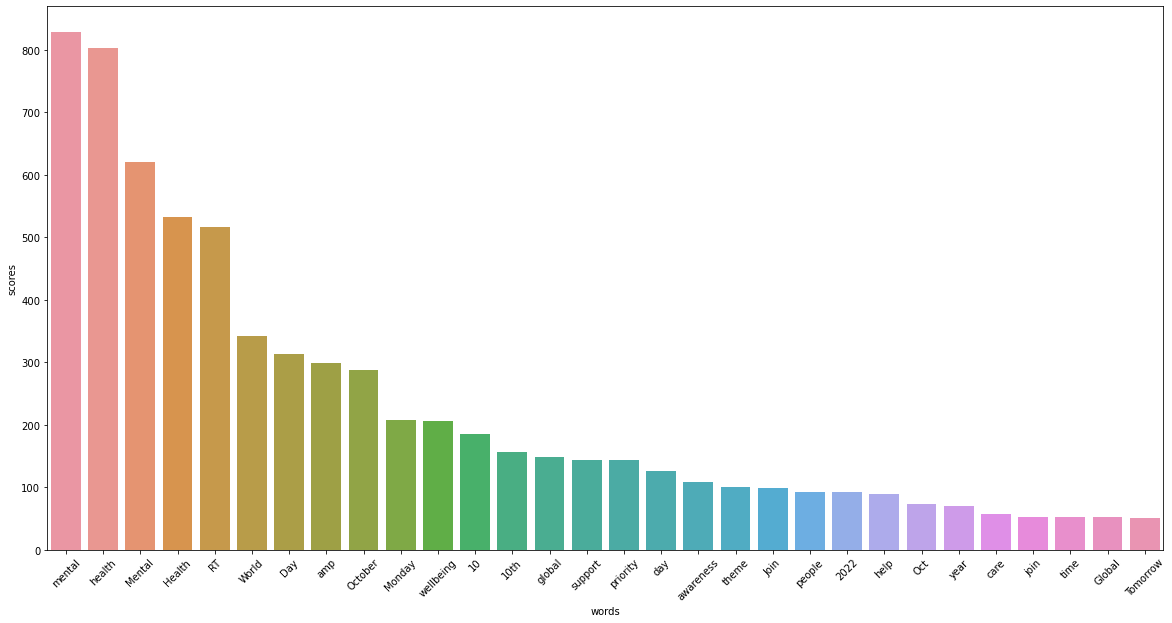

In [73]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'words',y = 'scores',data = neg_df)
plt.xticks(rotation = 45)
plt.show()

In [74]:
pos_df = pd.DataFrame(most_common_pos_words,columns=['words','scores'])
pos_df

,words,scores
0,mental,1021
1,health,1013
2,RT,758
3,Mental,544
4,amp,538
5,Health,501
6,October,460
7,Monday,438
8,wellbeing,354
9,support,322


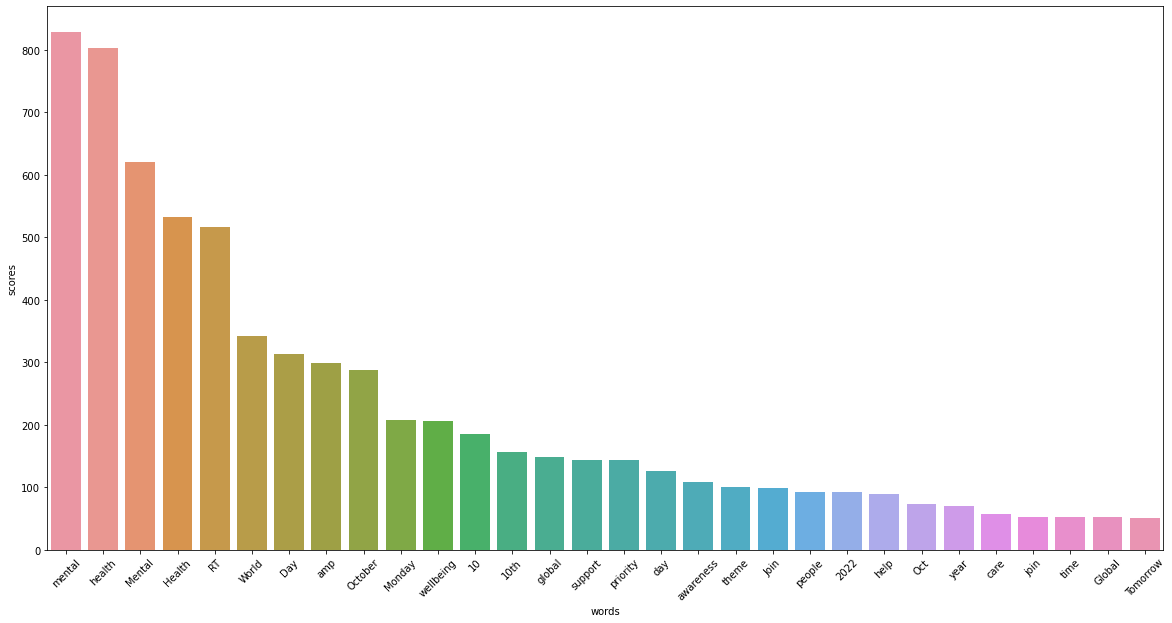

In [75]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'words',y = 'scores',data = neg_df)
plt.xticks(rotation = 45)
plt.show()

In [76]:
neu_df = pd.DataFrame(most_common_pos_words,columns=['words','scores'])
neu_df

,words,scores
0,mental,1021
1,health,1013
2,RT,758
3,Mental,544
4,amp,538
5,Health,501
6,October,460
7,Monday,438
8,wellbeing,354
9,support,322


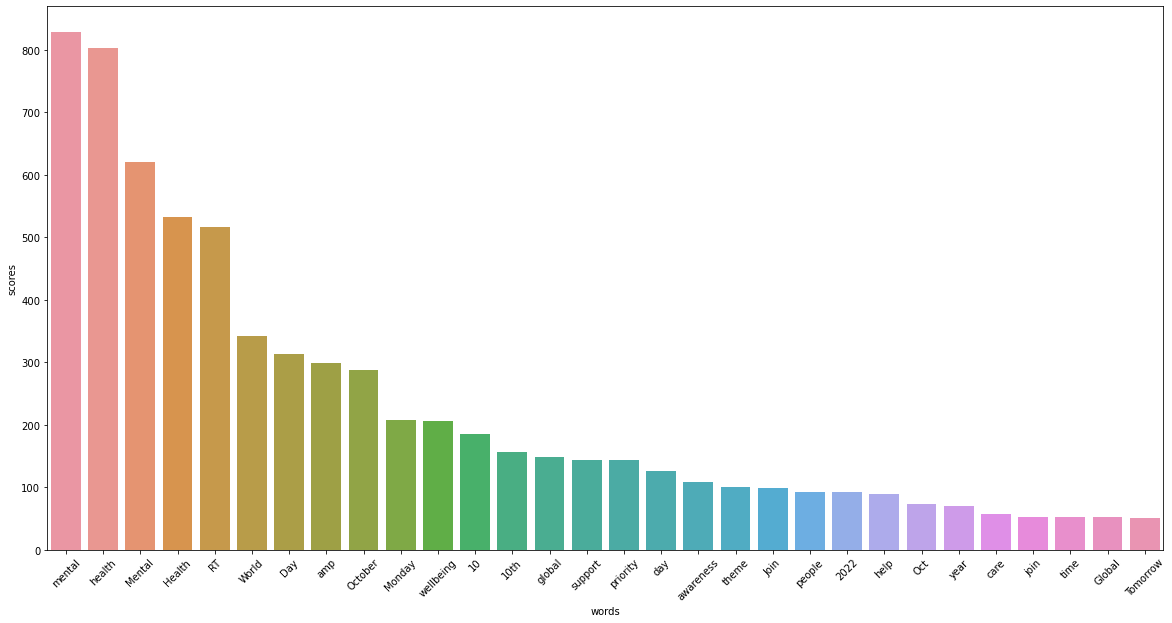

In [77]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'words',y = 'scores',data = neg_df)
plt.xticks(rotation = 45)
plt.show()

In [79]:
!pip install wordcloud

In [81]:
from wordcloud import WordCloud

In [85]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

In [86]:
pos_docx = ' '.join(pos_tokens)

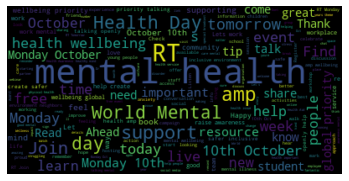

In [87]:
plot_wordcloud(pos_docx)

In [88]:
neg_docx = ' '.join(neg_tokens)

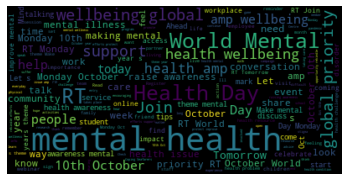

In [89]:
plot_wordcloud(neg_docx)

In [90]:
neu_docx = ' '.join(neu_tokens)

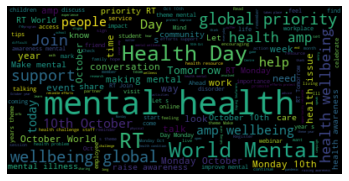

In [91]:
plot_wordcloud(neg_docx)